Prediction model

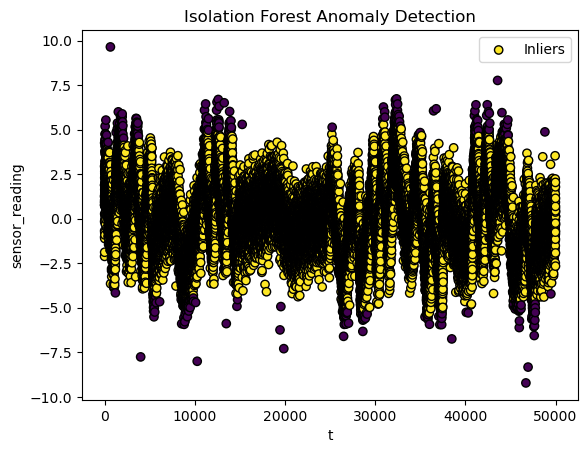

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

# Load data from CSV file
df = pd.read_csv('ad07.csv')

# Extract features from the DataFrame
X = df[['t', 'sensor_reading']].values

# Train the Isolation Forest model
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
clf.fit(X)

# Predict the anomalies
y_pred = clf.predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolor='k', label='Inliers')
plt.xlabel('t')
plt.ylabel('sensor_reading')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.show()

In [8]:
# Add the predicted labels as a new column to the DataFrame
df['anomaly'] = y_pred

# Filter the anomalous entries
anomalous_entries = df[df['anomaly'] == -1]

# Sort the anomalous entries by 'sensor_reading' in descending order
top_anomalous_entries = anomalous_entries.sort_values(by='sensor_reading', ascending=False).head(100)

# Export the top 100 anomalous entries to a text file
top_anomalous_entries.to_csv('output.txt', sep='\t', index=False, columns=['t'], header=None)

In [9]:
# Get the indices of anomalous entries
anomalous_indices = np.where(y_pred == -1)[0]

# Print the indices of anomalous entries
if len(anomalous_indices) > 0:
    print("Indices of anomalous entries:")
    print(anomalous_indices)
else:
    print("No anomalous entries found.")

Indices of anomalous entries:
[   20    60   142   243   259   280   433   435   451   534   644   851
  1413  1420  1421  1523  1642  1656  1658  1767  1768  1778  1787  1802
  1832  1863  1887  1904  1905  1946  1950  1957  1972  1975  1989  2026
  2077  2100  2113  2161  2188  2217  2356  2424  2512  3162  3236  3330
  3408  3439  3442  3445  3486  3492  3520  3538  3541  3557  3610  3626
  3674  3680  3682  3826  3862  3935  4000  4709  4796  4828  4870  4936
  4941  5015  5110  5229  5399  5418  5428  5432  5435  5457  5476  5485
  5488  5492  5514  5563  5587  5721  6102  6450  6725  6771  6967  7013
  7019  7401  7691  7702  7785  7849  7866  7915  7940  7961  7984  7987
  8054  8087  8217  8498  8550  8621  8698  8705  8726  8756  8797  8810
  8821  8856  8858  8865  8895  8899  8900  8905  8912  8936  8937  8959
  8963  8969  8991  9029  9078  9081  9086  9090  9093  9099  9112  9134
  9137  9143  9158  9175  9187  9225  9294  9295  9300  9334  9343  9384
  9440  9441  9488  9

Via trained AI One Class SVM

In [10]:
train_sz = int(len(df)*0.5)
train_dt, test_dt = df.iloc[:train_sz], df.iloc[train_sz:]

clf = OneClassSVM(nu=0.01,kernel='rbf',gamma=0.1)
clf.fit(train_dt[['sensor_reading']])

y_pred_train = clf.predict(train_dt[['sensor_reading']])
y_pred_test = clf.predict(test_dt[['sensor_reading']])

n_err_train = y_pred_train[y_pred_train == -1].size
n_err_test = y_pred_test[y_pred_test == -1].size
print("Number of errors on trianing set:", n_err_train)
print("Number of errors on test set", n_err_test)

Number of errors on trianing set: 296
Number of errors on test set 529


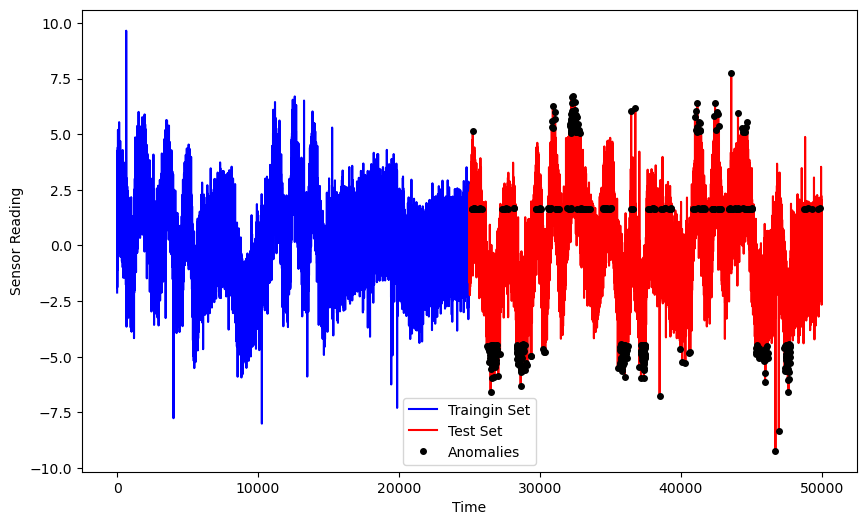

In [5]:
plt.figure(figsize=(10,6))
plt.plot(train_dt['t'],train_dt['sensor_reading'],'b',markersize=2)
plt.plot(test_dt['t'],test_dt['sensor_reading'],'r',markersize=2)
plt.plot(test_dt['t'][y_pred_test==-1],test_dt['sensor_reading'][y_pred_test==-1],'ko',markersize=4)
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.legend(['Traingin Set','Test Set','Anomalies'])
plt.show()

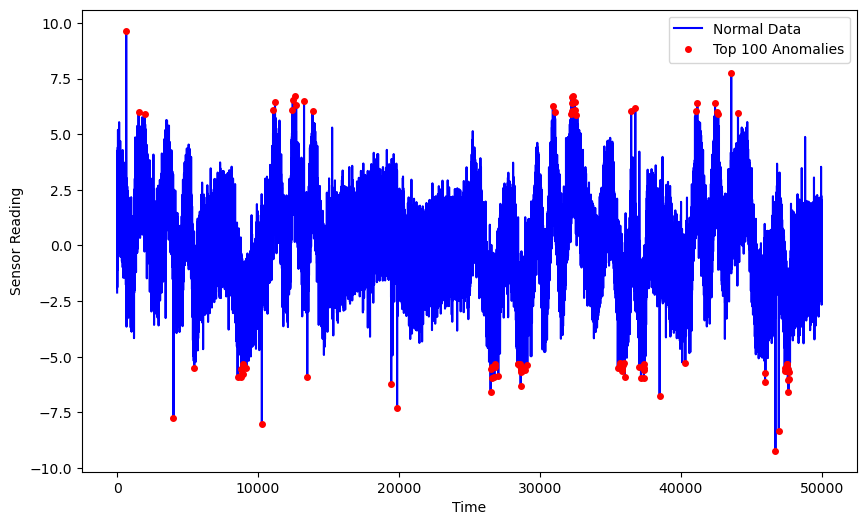

In [6]:
y_pred = clf.predict(df[['sensor_reading']])
df['anomaly_score'] = clf.decision_function(df[['sensor_reading']]) 

result = df.sort_values(by=['anomaly_score'])[:100]

plt.figure(figsize=(10,6))
plt.plot(df['t'],df['sensor_reading'],'b',markersize=2)
plt.plot(result['t'],result['sensor_reading'],'ro',markersize=4)
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.legend(['Normal Data','Top 100 Anomalies'])
plt.show()

In [11]:
# Export the top 100 anomalous entries to a text file
result.to_csv('output2.txt', sep='\t', index=False, columns=['t'], header=None)